In [2]:
import numpy as np
from matplotlib import pyplot as plt
import csv
%matplotlib inline
import os
import seaborn as sns


In [3]:
def load_cosmic_genes(cosmic_gene_file):
    gene_symbols = []
    gene_ids = []
    gene_ensg_ids = []
    ensg_to_symbol = {}
    with open(cosmic_gene_file, "r") as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            synonyms = row[19]
            if "ENSG" not in synonyms:
                continue
            gene_symbol = row[0]
            gene_symbols.append(gene_symbol)
            
            gene_id = row[2]
            gene_ids.append(gene_id)
            
            synonyms_tokens = synonyms.split("ENSG")
            start_idx = synonyms.index("ENSG")
            ensg_id = synonyms[start_idx : start_idx + 15]
            gene_ensg_ids.append(ensg_id)
            
            ensg_to_symbol[ensg_id] = gene_symbol
            
            #print(gene_symbol, gene_id, ensg_id)
            
    return gene_symbols, gene_ids, gene_ensg_ids, ensg_to_symbol
            
gene_symbols, gene_ids, gene_ensg_ids, ensg_to_symbol = load_cosmic_genes("cancer_gene_census.csv")
        
    

In [4]:
def list_cancer_types(directory):
    listings = next(os.walk(directory))
    cancer_types = listings[1]
    return cancer_types

cancer_types = list_cancer_types("/Users/sajal/multihit/PART1/ACC2HIT")
print(cancer_types)

['STAD', 'LUSC', 'LIHC', 'KIRP', 'LUAD', 'UCEC', 'BRCA', 'LGG', 'OV', 'PRAD', 'HNSC', 'GBM', 'THCA', 'SARC', 'CESC', 'BLCA', 'COAD']


In [275]:
cancer_types = list_cancer_types("/Users/sajal/multihit/PART1/ACC2HIT")
def plot_gene_frequencies(gene_freq_file, combination_file, comb_freq_file, cancer):
    normal_freqs = []
    tumor_freqs = []
    gene_to_frequency = {}
    with open(gene_freq_file, "r") as freq_reader:
        for line in freq_reader:
            tokens = line.split(",")
            gene = tokens[0]
            normal_freq = float(tokens[1])
            tumor_freq = float(tokens[2])            
            normal_freqs.append(normal_freq)
            tumor_freqs.append(tumor_freq)
            gene_to_frequency[gene] = [normal_freq, tumor_freq]
    # Plot all genes
    all_h = plt.scatter(normal_freqs, tumor_freqs, color="gray", marker=".", alpha=0.5)
    print(all_h)
        

    
    # Plot Cosmic Genes
    gene_symbols, gene_ids, gene_ensg_ids, ensg_to_symbol = load_cosmic_genes("cancer_gene_census.csv")
    cosmic_freqs_n = []
    cosmic_freqs_t = []
    for gene in gene_ensg_ids:
        if gene in gene_to_frequency:
            cosmic_freqs_n.append(gene_to_frequency[gene][0])
            cosmic_freqs_t.append(gene_to_frequency[gene][1])  
    cosmic_h = plt.scatter(cosmic_freqs_n, cosmic_freqs_t, color="green", marker="x", s=60, alpha=0.5)
    
    # Plot Tumorigenic genes
    cancer_genes = set()
    cancer_gene_freqs = []
    with open(combination_file, "r") as reader:
        for line in reader:
            if "Num" not in line:
                tokens = line.split()
                cancer_genes.add(tokens[0])
                cancer_genes.add(tokens[1])
        for gene in cancer_genes:
            cancer_gene_freqs.append(gene_to_frequency[gene])
    cancer_gene_freqs = np.array(cancer_gene_freqs)
    cancer_h = plt.scatter(cancer_gene_freqs[:, 0], cancer_gene_freqs[:, 1], marker="*", color="red", s=60)
    
    # Plot common genes
    common_genes = cancer_genes.intersection(gene_ensg_ids)
    common_freq_n = []
    common_freq_t = []
    common_gene_names = []
    
    for gene in common_genes:
        common_freq_n.append(gene_to_frequency[gene][0])
        common_freq_t.append(gene_to_frequency[gene][1])
        common_gene_names.append(ensg_to_symbol[gene])
    common_h = plt.scatter(common_freq_n, common_freq_t, marker="o", edgecolors="black", facecolors="none", s=80)
    for i, txt in enumerate(common_gene_names):
        #print(i, txt)
        #print(common_freq_t[i])
        plt.annotate(txt, (common_freq_n[i], common_freq_t[i]), 
                     xytext=(common_freq_n[i] + 0.01, common_freq_t[i] + 0.01), fontsize=17, fontweight="bold")
    
    
    
    
    # Plot Combinations
    comb_freqs_n = []
    comb_freqs_t = []
    with open(comb_freq_file, "r") as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            comb_freqs_n.append(float(row[2]))
            comb_freqs_t.append(float(row[3]))
    comb_h = plt.scatter(comb_freqs_n, comb_freqs_t, color="orange", marker="p")
    
    plt.plot([0.0, 1.0], [0.0, 1.0], linestyle="dashed", color="black")
    #plt.xlabel("Mutation frequency in normal samples")
    #plt.ylabel("Mutation frequency in tumor samples")
    plt.title(cancer)
    return all_h, cosmic_h, cancer_h, common_h, comb_h
    
    #plt.legend([all_h, cosmic_h, cancer_h, common_h, comb_h], ["All genes", "COSMIC genes", 
    #                                                          "Tumorigenic genes", 
    #                                                         "Tumorigenic + Cosmic genes",
    #                                                       "Tumorigenic combinations"])
    


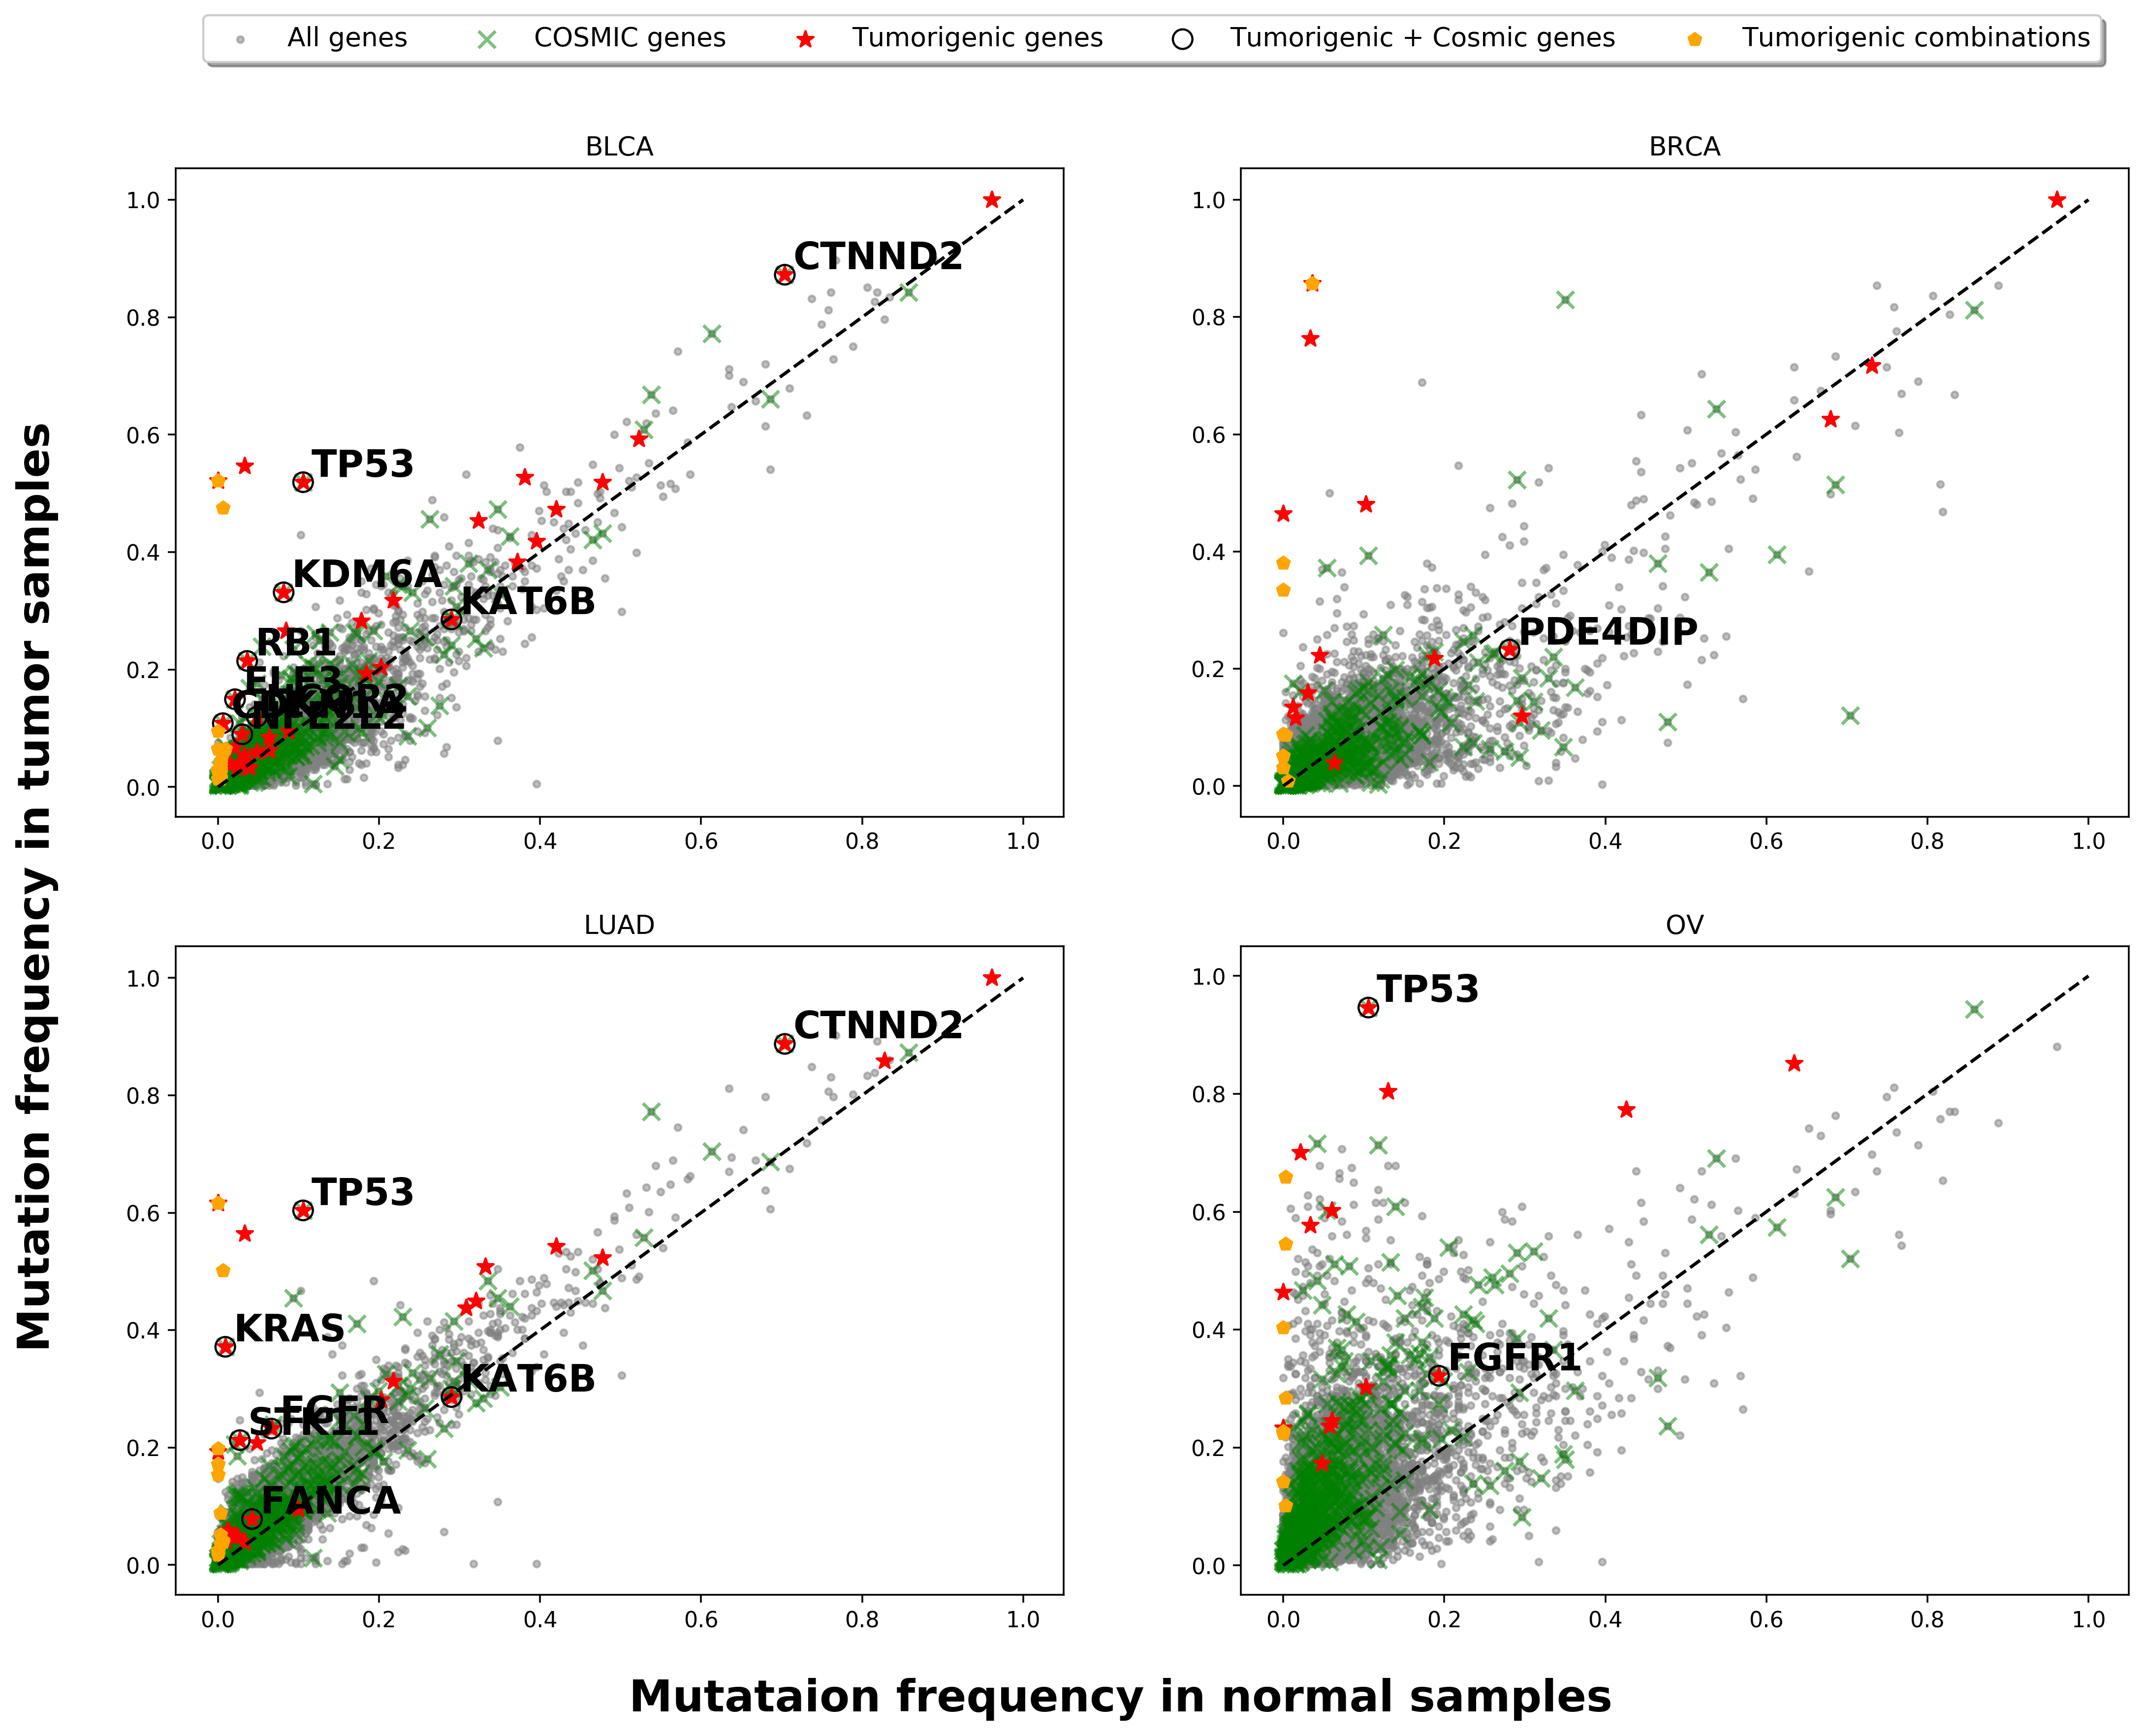

In [282]:
fig = plt.figure(1, (16, 12), dpi = 320, facecolor="none", edgecolor="none")
four_cancers = ["BLCA", "BRCA", "LUAD", "OV"]

all_h = None
cosmic_h = None
cancer_h = None
common_h = None
comb_h = None
ax = None

for i, cancer in enumerate(four_cancers):
    ax = plt.subplot(2, 2, i + 1)
    all_h, cosmic_h, cancer_h, common_h, comb_h = plot_gene_frequencies("/Users/sajal/multihit/PART1/frequency/" + cancer + "-frequency.csv", 
                      "/Users/sajal/multihit/PART1/ACC2HIT/" + cancer + "/" + cancer + "-combinations",
                     "/Users/sajal/multihit/PART1/frequency/" + cancer + "-combination-frequency.csv", cancer)
    


#ax.legend(h1, l1, loc='center right', bbox_to_anchor=(0.85, 1.05),
#          ncol=8, fancybox=True, shadow=True)
ax.legend([all_h, cosmic_h, cancer_h, common_h, comb_h], 
          ["All genes", "COSMIC genes", "Tumorigenic genes", "Tumorigenic + Cosmic genes","Tumorigenic combinations"],
         loc="center", bbox_to_anchor=(-0.1, 2.4), ncol=5, fancybox=True, shadow=True, fontsize=12)

fig.text(0.50, 0.07, "Mutataion frequency in normal samples", fontsize=20, fontweight="bold", ha='center', va='center')
fig.text(0.07, 0.50, "Mutation frequency in tumor samples", fontsize=20, fontweight="bold", ha='center', va='center', rotation=90)
fig.savefig("frequency.pdf")
        